# Vehicle Models: Kinematic Bicycle Model

## Overview

The Vehicle Kinematic Bicycle Model is a simplified representation of a vehicle that is widely used in the field of vehicle dynamics. It provides a useful approximation of a vehicle's motion, steering, and turning dynamics, allowing engineers and researchers to gain insights into its behavior without considering more complex factors such as tire dynamics or vehicle suspensions.

In this model, a vehicle is represented as a bicycle with two main wheels: a front wheel and a rear wheel. The front wheel represents the steering dynamics of the vehicle, while the rear wheel represents the propulsion and driving force. The vehicle's motion is described by a set of kinematic equations that relate the vehicle's position, velocity, and acceleration.

The Vehicle Kinematic Bicycle Model assumes a few key simplifications and assumptions:

1. **Planar Motion**: The model assumes that the vehicle's motion occurs in a two-dimensional plane, neglecting any vertical movements or roll dynamics.

2. **Instantaneous Slip Angle**: The slip angle, which is the angle between the direction of the vehicle's velocity and the direction of the front wheel, is assumed to be zero. This assumption simplifies the steering dynamics.

3. **Constant Velocity**: The model assumes a constant forward velocity of the vehicle during the analysis. It does not consider acceleration or deceleration explicitly.

4. **No Wheel Slip**: The model assumes that the wheels do not experience any slip, which means that they rotate without sliding or skidding.

Despite these simplifications, the Vehicle Kinematic Bicycle Model provides valuable insights into vehicle dynamics, such as analyzing turning behavior, stability, and trajectory tracking. It serves as a foundation for more advanced vehicle models and control systems.

In the following sections, we will delve deeper into the equations and concepts of the Vehicle Kinematic Bicycle Model.

In [1]:
from dataclasses import dataclass
from typing import Tuple, Union, Optional

import ipywidgets as widgets
from IPython.display import display, clear_output

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arc
from matplotlib.transforms import Affine2D

from tools.plot_tools import plot_car_perspectives

## Vehicle States and Inputs

Before we delve into the kinematic equations of the Vehicle Kinematic Bicycle Model, let's first understand the states and inputs that describe the vehicle's motion.

Vehicle States ($s$):

$$
s = \begin{bmatrix}
x  \\
y \\
\psi \\
v   
\end{bmatrix} 
$$

- $x$: The x-coordinate of the vehicle's position in the 2D plane.
- $y$: The y-coordinate of the vehicle's position in the 2D plane.
- $\psi$: The orientation angle of the vehicle with respect to a reference frame.
- $v$: The forward velocity of the vehicle.

Control Inputs - Actuators ($u$):

$$
u = \begin{bmatrix}
\delta  \\
a    
\end{bmatrix} 
$$

- $\delta$: The steering angle of the front wheel. It determines the direction of the vehicle's turn.
- $a$: The acceleration applied to the vehicle.

Now, let's implement the code to represent the vehicle states and control inputs in Python:

In [2]:
@dataclass
class CarState:
    x : float
    y : float
    psi : float
    v : float

    def copy(self):
        return CarState(self.x, self.y, self.psi, self.v)

@dataclass
class Actuators:
    accel : float
    steering_angle : float

## Vehicle kinematics equations

In this section, we will derive the kinematic equations that describe the motion of the vehicle based on the Vehicle Kinematic Bicycle Model.

The vehicle's motion can be represented by the following set of equations:

- $ x_{t+1} = x_t + v_t * cos(\psi_t) * dt$
- $ y_{t+1} = y_t + v_t * sin(\psi_t) *dt $
- $ \psi_{t+1} = \psi_t + \frac{v_t}{L_f} * tan(\delta_t) *dt $
- $ v_{t+1} = v_t + a_t *dt $

Where:

- $x_{t+1}$ and $x_{t}$ are the coordinates of the car in $x$ at time $t+1$ and $t$ respectively.
- $y_{t+1}$ and $y_{t}$ are the coordinates of the car in $y$ at time $t+1$ and $t$ respectively.
- $\psi_{t+1}$ and $\psi_{t}$ are the headings of the car at time $t+1$ and $t$ respectively.
- $v_{t+1}$ and $v_t$ are velocities of the car at time $t+1$ and $t$ respectively.
- $\delta_t$ is the steering angle of the front wheel at time $t$.
- $a_t$ is the acceleration of the car at time $t$.
- $dt$ the time duration between timestep $t$ and timestep $t+1$. 
- $L_f$ wheelbase lenght in meters.

Now, let's implement the kinematic equations in a separate class:


In [3]:
class KinematicBicycleModel:
    """
    Kinematic Bicycle Model represents a vehicle using a simplified kinematic model.
    It calculates the vehicle's next state based on the current state and control inputs.

    Args:
        wheelbase (float): Distance between the front and rear axles of the vehicle.
        car_width (float, optional): Width of the vehicle. Defaults to 1.5.
        x0 (float, optional): Initial x-coordinate of the vehicle. Defaults to 0.0.
        y0 (float, optional): Initial y-coordinate of the vehicle. Defaults to 0.0.
        psi0 (float, optional): Initial orientation angle of the vehicle. Defaults to 0.0.
        v0 (float, optional): Initial velocity of the vehicle. Defaults to 0.0.

    Methods:
        update(u_t, dt=0.01, old_state=None):
            Calculates the next state of the vehicle based on control inputs and timestep.
            Can also update a different input state if specified.
            Returns the updated state.

        get_state():
            Returns the current state of the vehicle.

    """

    def __init__(self, wheelbase : float, car_width : float = 1.5, x0:float = 0.0, y0 : float = 0.0 , psi0: float = 0.0, v0 = 0.0):
        """
        Initializes the KinematicBicycleModel with the provided parameters.

        Args:
            wheelbase (float): Distance between the front and rear axles of the vehicle.
            car_width (float, optional): Width of the vehicle. Defaults to 1.5.
            x0 (float, optional): Initial x-coordinate of the vehicle. Defaults to 0.0.
            y0 (float, optional): Initial y-coordinate of the vehicle. Defaults to 0.0.
            psi0 (float, optional): Initial orientation angle of the vehicle. Defaults to 0.0.
            v0 (float, optional): Initial velocity of the vehicle. Defaults to 0.0.
        """
        self._wheelbase = wheelbase
        self._width = car_width
        self._state = CarState(x0, y0, psi0, v0)
        
    def update(self, u_t : Actuators, dt:float = 0.01, old_state : CarState = None) -> CarState:
        """
        Updates the vehicle's state based on the control inputs and timestep.

        Args:
            u_t (Actuators): Control inputs for the vehicle (acceleration and steering angle).
            dt (float, optional): Timestep for the update. Defaults to 0.01.
            old_state (CarState, optional): State of the vehicle to update. If None, uses the stored state. Defaults to None.

        Returns:
            CarState: Updated state of the vehicle.
        """
        
        # Current State
        x_t = self._state.x
        y_t = self._state.y
        psi_t = self._state.psi
        v_t = self._state.v

        # In case we want to update a different state, rather than the one
        # stored in the model class.
        if not old_state is None:
            x_t = old_state.x
            y_t = old_state.y
            psi_t = old_state.psi
            v_t = old_state.v
    
        # Control signals
        a_t = u_t.accel
        delta_t = u_t.steering_angle

        # Kinematic Bicycle Model equations
        x_new = x_t + v_t * np.cos(psi_t) * dt
        y_new = y_t + v_t * np.sin(psi_t) * dt
        psi_new = psi_t + (v_t/self._wheelbase) * np.tan(delta_t) * dt
        v_new = v_t + a_t * dt

        # Update model state
        self._state.x = x_new
        self._state.y = y_new
        self._state.psi = psi_new
        self._state.v = v_new
        return self._state.copy()
    
    def get_state(self)-> CarState:
        """
        Returns the current state of the vehicle.

        Returns:
            CarState: Current state of the vehicle.
        """
        return self._state

The `KinematicBicycleModel` class encapsulates the vehicle kinematic model. It is initialized with the car parameters and the initial state of the vehicle. The `update` function calculates the next state of the vehicle based on a control input and a timestep. Additionally, it provides the flexibility to calculate the next state based on a different input state than the one stored in the class.

Let's create a plotting function to visualize the car's state and its updates over time.

In [4]:
def plot_car(state : CarState, t: float, wheelbase=2.5, car_width = 1.5, output = widgets.Output):
    """
    Plots the car based on its current state.

    Args:
        state (CarState): Current state of the car.
        t (float): Time value.
        wheelbase (float, optional): Distance between the front and rear axles of the car. Defaults to 2.5.
        car_width (float, optional): Width of the car. Defaults to 1.5.
        output (widgets.Output, optional): Output widget for displaying the plot. Defaults to widgets.Output.

    Returns:
        None
    """
    
    with output:
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(5,5))

        ts = ax.transData
        tr = Affine2D().rotate_deg_around(state.x, state.y, np.rad2deg(state.psi))

        car_rect = Rectangle((state.x-wheelbase/2, 
                              state.y-car_width/2), 
                              wheelbase, 
                              car_width, 
                              transform = tr + ts,
                              facecolor = 'gray',
                              fill = True)
        
        ax.add_patch(car_rect)
        ax.plot(state.x, state.y, 'r.')
        ax.set_xlim(state.x-10, state.x+10)
        ax.set_ylim(state.y-10, state.y+10)
        ax.text(state.x-9, state.y+3, 
                r'$\mathbf{time:}$' + f' {t:.2f} s\n' +
                r'$\mathbf{x:}$' + f' {state.x:.2f} m\n' + 
                r'$\mathbf{y:}$' + f' {state.y:.2f} m\n' +
                r'$\mathbf{psi:}$' + f' {np.rad2deg(state.psi):.2f} °\n' +
                r'$\mathbf{v:}$' + f' {state.v:.2f} ' +  r'$\frac{m}{s}$' + '\n',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

The code provided demonstrates the creation of a car object and the setup for a simulation where the car's state and its updates over time will be visualized. 

**Car Creation:** The car object is created using the `KinematicBicycleModel` class, with the specified parameters such as the wheelbase, car width, and initial orientation (psi0).

**Button and Sliders:** Three sliders are defined using the `widgets.FloatSlider` class. These sliders allow the user to control the acceleration (`accel_slider`), steering angle (`steering_slider`), and time step (`dt_slider`). An update button (`update_button`) is also defined.

**Event Handling:** An event handler function (`on_update_button_clicked`) is defined to handle the button click event. When the update button is clicked, this function retrieves the values from the sliders, updates the car's state based on the provided inputs, and plots the updated state.

**Initial State and Plot:** The initial state of the car is updated with zero acceleration and zero steering angle (`Actuators(0, 0)`) using the car.update method. The initial state is then plotted using the plot_car function.

Overall, this code sets up a simulation environment where the user can interactively control the car's acceleration and steering angle using sliders, and observe the car's state and updates over time through the plot displayed in the output widget.

In [5]:
# Create car
wheelbase = 2.5 # m
car_width = 1.5 # m
psi0 = 90 # degrees

car = KinematicBicycleModel(wheelbase, car_width= car_width, psi0 = np.radians(psi0))

# Define simulation time step
t = 0

# Define output widget for the plot
output = widgets.Output()

# Define what happens when buttons are clicked
def on_update_button_clicked(b):
    global t
    u_t = Actuators(accel_slider.value, -np.radians(steering_slider.value))
    dt = dt_slider.value
    state = car.update(u_t, dt)
    t += dt
    plot_car(state, t, output=output, wheelbase=car._wheelbase, car_width=car._width)

# Define buttons
update_button = widgets.Button(description='Update')

# Define acceleration slider
accel_slider = widgets.FloatSlider(
value=0,
min=-2.0,
max=2.0,
step=0.01,
description='accel(m/s^2):',
continuous_update=False
)

steering_slider = widgets.FloatSlider(
    value=0,
    min=-30.0,
    max=30.0,
    step=0.1,
    description='δ (deg):',
    continuous_update=False
)

dt_slider = widgets.FloatSlider(
    value=0.00,
    min=0.01,
    max=1,
    step=0.05,
    description='time step (s):',
    continuous_update=False
)

# Attach the event to the buttons
update_button.on_click(on_update_button_clicked)

# Display slider, arrow keys and output
display(dt_slider, accel_slider, steering_slider, update_button, output)

# plot first state
state = car.update(Actuators(0,0), dt_slider.value)
plot_car(state, t, output=output, wheelbase=car._wheelbase, car_width=car._width)

FloatSlider(value=0.01, continuous_update=False, description='time step (s):', max=1.0, min=0.01, step=0.05)

FloatSlider(value=0.0, continuous_update=False, description='accel(m/s^2):', max=2.0, min=-2.0, step=0.01)

FloatSlider(value=0.0, continuous_update=False, description='δ (deg):', max=30.0, min=-30.0)

Button(description='Update', style=ButtonStyle())

Output()

## Polynomial fitting

Understanding the concept of polynomial fitting and its relevance to cross track error calculation is crucial in autonomous vehicle applications. Polynomial fitting allows us to approximate a smooth curve that closely represents a set of data points. In the context of cross track error calculation, polynomial fitting enables us to estimate the desired trajectory and measure the deviation of the vehicle from that trajectory.

To illustrate this concept, let's consider an example where we have a set of reference waypoints representing the desired path for the autonomous vehicle. We will fit a polynomial curve to these waypoints and use it to calculate the cross track error at any given point. The example consist of a path calculated from the path planner module of the vehicle store in.

<function matplotlib.pyplot.show(close=None, block=None)>

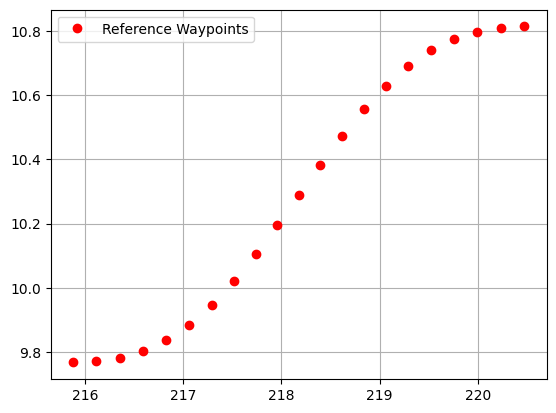

In [6]:
import json

# Load path from json
data = None
with open('dataset/path.json', 'r') as file:
    data = json.load(file)

path = np.asarray(data["path"])


# plot path
fig, ax = plt.subplots()
plt.plot(path[:,0], path[:,1], 'ro', label='Reference Waypoints')
ax.legend()
ax.grid()
plt.show


In the code above, we fit a polynomial curve to the reference waypoints using the `np.polyfit` function. We specify the `degree` of the polynomial curve as degree (you can adjust this value as needed). The resulting coefficients are stored in the coefficients array. We then create a polynomial function `fitted_curve` using `np.poly1d` to represent the fitted curve.

To calculate the cross track error, we assume a specific point with known x_point (the current x-coordinate of the vehicle's position). We use the fitted curve to determine the corresponding `y_point` (the y-coordinate of the fitted curve at the given x-coordinate). Finally, we compute the difference between `y_point` and the actual y-coordinate to obtain the cross track error.

To visualize the fitted curve and cross track error, we plot the reference waypoints, the fitted curve, the current position as a blue dot, and a dashed green line indicating the cross track error.

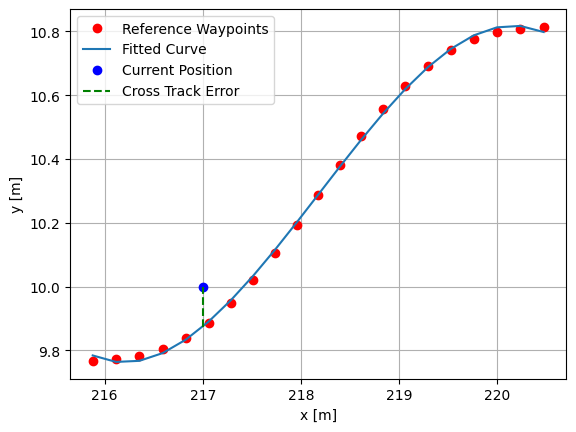

In [7]:
# Extract the data
xs = path[:,0]
ys = path[:,1]

# Example car state
state = CarState(217, 10, 13, 0)

# specify the degree of the polynomial 
degree = 3

# Fit a polynomial curve
coeff = np.polyfit(xs,ys, deg=degree)
fitted_curve = np.poly1d(coeff)

# Calculate cross track error for a specific point
x_point = state.x # x-coordinate of the vehicle's current position
y_point = fitted_curve(x_point)  # y-coordinate of the fitted curve at the given x-coordinate
cross_track_error = y_point - state.y  # calculate the difference between the fitted curve and the actual y-coordinate

# Visualize the fitted curve and the cross track error
plt.plot(xs, ys, 'ro', label='Reference Waypoints')
plt.plot(xs, fitted_curve(xs), label='Fitted Curve')
plt.plot(x_point, state.y, 'bo', label='Current Position')
plt.plot([x_point, x_point], [y_point, state.y], 'g--', label='Cross Track Error')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.grid()
plt.show()


Here is an interactive example where you can change the degree

In [8]:
import json
from ipywidgets import interact
import ipywidgets as widgets

def run_polyfit(deg):
    xs = path[:,0]
    ys = path[:,1]

    # Fit a polynomial curve
    coeff = np.polyfit(xs,ys, deg=deg)
    fitted_curve = np.poly1d(coeff)

    # Calculate cross track error for a specific point
    state = CarState(217, 10, 13, 0)
    x_point = state.x # x-coordinate of the vehicle's current position
    y_point = fitted_curve(x_point)  # y-coordinate of the fitted curve at the given x-coordinate
    cross_track_error = y_point - state.y  # calculate the difference between the fitted curve and the actual y-coordinate
    
    # plot path and calculated polynomial
    fig, ax = plt.subplots()
    ax.plot(xs, ys, 'ro', label='Reference Waypoints')
    ax.plot(xs, fitted_curve(xs), label='Fitted Curve')
    ax.plot(x_point, state.y, 'bo', label='Current Position')
    ax.plot([x_point, x_point], [y_point, state.y], 'g--', label='Cross Track Error')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_xlim([xs[0]- 0.1, xs[-1]+0.1])
    ax.set_ylim([ys[0]- 0.1, ys[-1]+0.1])
    ax.legend()
    ax.grid()
    plt.show()

# Load path from json
file = open('dataset/path.json', 'r')
data = json.load(file)
path = np.asarray(data["path"])
file.close()

# Define deg slider
deg_slider = widgets.IntSlider( value=1, min=0, max=9, step=1)
interact(run_polyfit, deg=deg_slider)

interactive(children=(IntSlider(value=1, description='deg', max=9), Output()), _dom_classes=('widget-interact'…

<function __main__.run_polyfit(deg)>

# Polyfit in vehicle perspective

Polynomial fitting is a mathematical technique used to approximate a smooth curve that best represents a set of data points. In the context of autonomous vehicles, polynomial fitting plays a crucial role in estimating and modeling the desired trajectory for path planning and control.

When calculating cross track error, it is important to use local coordinates rather than global coordinates. Local coordinates are defined with respect to a reference frame, typically aligned with the desired trajectory. By using local coordinates, we can simplify the calculation of cross track error and ensure accurate and reliable results.

Using local coordinates offers several advantages:

- **Simpler Calculation:** With local coordinates, the calculation of cross track error becomes simpler as it involves measuring the lateral distance between the vehicle's position and the fitted curve in the vehicle coordinate system.
- **Robustness to Orientation Changes:** Local coordinates are inherently robust to changes in the vehicle's orientation. As long as the vehicle remains close to the desired trajectory, the cross track error calculation remains consistent.
- **Modularity and Flexibility:** Local coordinates allow us to separate the trajectory modeling and cross track error calculation from the global coordinate system, providing modularity and flexibility in the algorithm design and implementation.

To utilize local coordinates, it is essential to have a reference frame aligned with the desired trajectory. This reference frame can be established through techniques such as coordinate transformation.

For this we will use homegeneous transformation. We know that the transformation of the car with respect to the global coordinates is given by the state of the car.

$$T<t_x,t_y,\psi>$$

Given a point $\hat{p}$ in local coordinates, we can express that point in global coordinates $p$ as:

$$p = R\hat{p}+t$$

$$
R = \begin{bmatrix}
cos(\psi) & -sin(\psi)  \\
sin(\psi) & cos(\psi)\\
\end{bmatrix} 
$$

$$
t = \begin{bmatrix}
t_x  \\
t_y \\
\end{bmatrix} 
$$

Where:

- $R$ is the rotation matrix.
- $t$ the translation vector.
- $t_x$ the x position of the car
- $t_y$ the y position of the car

Manipulating the transformation equation we obtain that:

$$\hat{p} = R^{-1}(p-t)$$

Lets code this in a function called `path_to_car_perspective`

In [9]:
def path_to_car_perspective(car_state: CarState, path : np.array)-> np.array:
    path_transformed = path.copy()
    # dx
    path_transformed[:,0] = path_transformed[:,0] - car_state.x
    # dy
    path_transformed[:,1] = path_transformed[:,1] - car_state.y
    # angle
    angle = car_state.psi+np.pi/2
    # Rotation matrix
    R = [[np.cos(-angle), -np.sin(-angle)],
         [np.sin(-angle), np.cos(-angle)]]

    # Apply rotation
    path_transformed = R@path_transformed.T

    return path_transformed.T

Now we will create an example to show the difference of the path in the different perspectives.

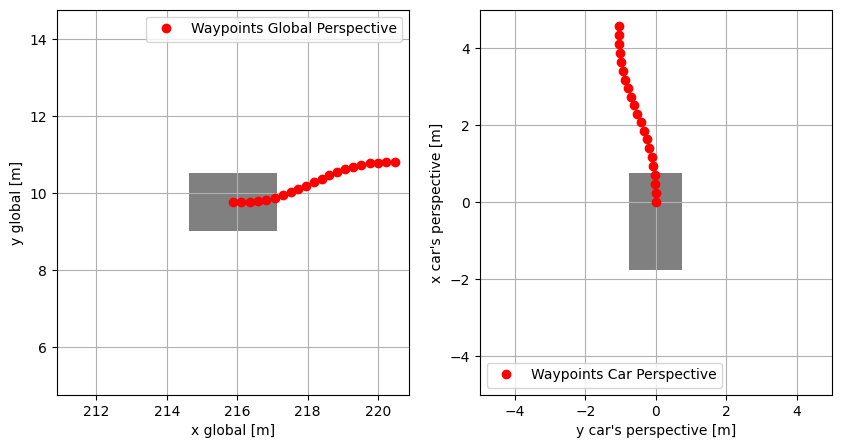

In [10]:
# Load path from json
file = open('dataset/path.json', 'r')
data = json.load(file)
path = np.asarray(data["path"])
file.close()

# Create car

wheelbase = 2.5 # m
car_width = 1.5 # m
x0 = path[0,0]
y0 = path[0,1]
psi0 = 0.0 # degrees

car = KinematicBicycleModel(wheelbase, car_width= car_width,x0 = x0, y0=y0, psi0 = np.radians(psi0))
state = car.get_state()
path_transformed = path_to_car_perspective(state, path)
plot_car_perspectives(state, path, path_transformed)

Next we can create an interactive example to show how does the path change when we move the vehicle around the waypoints.

You can use the `idx` slider to change in which waypoint is the vehicle and `psi0` the orientation of the vehicle.

In [11]:
# Define deg slider
def run_change_s0(idx, psi0):
    # Create car

    wheelbase = 2.5 # m
    car_width = 1.5 # m
    x0 = path[idx,0]
    y0 = path[idx,1]
    psi0 = psi0 # degrees
    car = KinematicBicycleModel(wheelbase, car_width= car_width,x0 = x0, y0=y0, psi0 = np.radians(psi0))
    state = car.get_state()
    path_transformed = path_to_car_perspective(state, path)
    plot_car_perspectives(state, path, path_transformed)

idx_slider = widgets.IntSlider( value=0, min=0, max=20, step=1)
heading_slider = widgets.IntSlider( value=0, min=0, max=90, step=1)

interact(run_change_s0, idx=idx_slider, psi0=heading_slider)

interactive(children=(IntSlider(value=0, description='idx', max=20), IntSlider(value=0, description='psi0', ma…

<function __main__.run_change_s0(idx, psi0)>

Let's explore the behavior of cross track error and heading error from the vehicle's perspective as the car moves along the map. We have developed an interactive code that allows you to adjust various parameters and observe their impact on the fitted curve and error calculations in real-time. This interactive environment provides a professional and detailed analysis of the effects of different settings.

Using sliders, you can precisely control the polynomial degree, x-offset, y-offset, and initial heading of the vehicle. As you make adjustments, the code will update the fitted curve and calculate the corresponding cross track error and heading error. This dynamic visualization enables you to gain a comprehensive understanding of how changes in these parameters affect the vehicle's trajectory and error measurements.

In [12]:
def run_polyfit_transformed(deg, x_offset, y_offset, psi0):
    # Define cars parameters
    wheelbase = 1.5 # m
    car_width = 0.5 # m
    x0 = path[0,0] + x_offset   # Lets set is position to be in the first point
    y0 = path[0,1] + y_offset   # of the path with an offset controlled by the user
    psi0 = psi0 # Set cars headings

    # Create car model
    car = KinematicBicycleModel(wheelbase, car_width= car_width,x0 = x0, y0=y0, psi0 = np.radians(psi0))
    
    # Get car State
    state = car.get_state()
    # Transform path to follow, into cars perspective
    path_transformed = path_to_car_perspective(state, path)
    
    # Perferm polynomial fitting to that path
    xs = path_transformed[:,1]
    ys = path_transformed[:,0] 
    coeff = np.polyfit(xs, ys, deg=deg)
    
    # calculate errors
    # As we are in cars perspective, the state of the car in its own perspective is
    # x=0, y=0 and heading=0
    # Theferefore, the cross track error would be:
    # cte = f(x) - y
    # as f(x) is a polynomial: f(0) = bias of the polynomial
    # np.polyfit gives the coefficient in inverse order.
    # therefor the bias is coeff[-1]
    # the cte = f(0) - y = coeff[-1] - 0 = coeff[-1] 
    cte = coeff[-1]

    # For the error in heading, we have that:
    # epsi = desired_heading - current_heading
    # as we are in cars perspective, current_heading = 0
    # and desired_heading = arctan(-f'(x)). as x=0
    # desired_heading = arctan(-f'(0))
    # however, f'(0) is equal to the coefficient that 
    # multiplies x^1. 
    # np.polyfit give us that coefficient in (coeff[-2])
    # therefore:
    # epsi = desired_heading - current_heading
    # epsi = arctan(-f'(0)) - 0
    # epsi = arctan(-coeff[-2])
    epsi = np.arctan(-coeff[-2])
    # To degress for showing porpuses
    epsi_deg = np.rad2deg(epsi)

    # Plot path
    fig, ax = plt.subplots()
    ax.plot(-ys, -xs,'ro', label='Waypoints in car perspective')

    # Plot polynomial fitting
    xs_p = np.linspace(xs[0], xs[-1], 100)
    ys_p = np.polyval(coeff, xs_p)
    ax.plot(-ys_p, -xs_p, label='Polynomial Fitting')

    # Plot Cross Track error
    ax.plot([0,-np.polyval(coeff, 0)], [0,0], "orange", label="Cross Track Error")
    
    # Plot Heading error
    ax.plot([0,-3*np.sin(epsi)], [0, 3*np.cos(epsi)], "--g", label="Error Heading")
    if epsi < 0:
        arc = Arc((0, 0), 1, 1, angle=90, theta1=epsi_deg, theta2=0, color='green')
    else:
        arc = Arc((0, 0), 1, 1, angle=90, theta1=0, theta2=epsi_deg, color='green')

    ax.add_patch(arc)

    # Plot car
    # In car perspective, x goes to the front of the car, y to the sides
    ts = ax.transData
    tr = Affine2D().rotate_deg_around(0, 0, np.rad2deg(np.pi/2))
    car_rect = Rectangle((0-wheelbase/2,
                            0-car_width/2),
                            wheelbase,
                            car_width,
                            transform = tr + ts,
                            facecolor = 'gray',
                            fill = True)

    ax.add_patch(car_rect)

    # Added text
    text = [f"a{deg-(i)}: {coeff[i]:.3f}" for i in range(deg+1)]
    text = "\n".join(text)
    title = "+".join([rf"$a_{i}X^{i}$" for i in range(deg,-1,-1)])
    ax.set_title(title)
    ax.text(-3.5, -1.5, 
            r'$\mathbf{Coeff:}$' + text,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    ax.text(1.5, -1.5, 
            r'$\mathbf{cte:}$' + f"{cte:.3f} m\n"+
            r'$\mathbf{e_\psi:}$' + f"{epsi_deg:.3f}°\n",
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    # Plot parameters
    ax.set_xlabel("y [m]")
    ax.set_ylabel("x [m]")
    ax.set_xlim(-4,4)
    ax.set_ylim(-2.5,5)
    ax.legend()
    ax.grid()
    plt.show

x_slider = widgets.FloatSlider(value=0, min=-20, max=20, step=0.01, layout=widgets.Layout(width='500px'))
y_slider = widgets.FloatSlider(value=0, min=-20, max=20, step=0.01, layout=widgets.Layout(width='500px'))
heading_slider = widgets.IntSlider( value=0, min=-90, max=90, step=1, layout=widgets.Layout(width='500px'))
deg_slider = widgets.IntSlider(value=3, min=0, max=9, step=1)

interact(run_polyfit_transformed, deg = deg_slider, x_offset=x_slider, y_offset = y_slider, psi0=heading_slider)

interactive(children=(IntSlider(value=3, description='deg', max=9), FloatSlider(value=0.0, description='x_offs…

<function __main__.run_polyfit_transformed(deg, x_offset, y_offset, psi0)>

## Everything together

Let us now integrate all the components and run a simulated scenario where you can control the vehicle's behavior using the kinematic bicycle model, while observing the effects of transforming the path to local coordinates and performing polynomial fitting.

The objective of this simulation is to drive the vehicle and aim for a maximum error of less than 1 meter throughout the entire duration. By adjusting the sliders provided, you can interactively control key parameters such as acceleration, steering angle, time step, and polynomial degree. This interactive environment enables you to analyze and visualize the impact of these parameters on the vehicle's trajectory and error measurements in real-time.

The following sliders are available for your control and observation:

1. **Acceleration Slider**:
    - This slider governs the acceleration value of the vehicle, expressed in meters per second squared (m/s^2).
    - Adjusting the slider modifies the acceleration input, allowing you to simulate different acceleration scenarios.
    - The chosen acceleration value directly influences the rate at which the vehicle's velocity changes.

2. **Steering Slider**:
    - The steering slider empowers you to control the steering angle of the vehicle, measured in degrees.
    - Altering the slider position varies the steering input, enabling you to simulate diverse turning maneuvers.
    - The steering angle plays a vital role in determining the direction in which the vehicle turns.

3. **Time Step Slider**:
    - This slider determines the time step utilized in the simulation, measured in seconds (s).
    - By adjusting the time step, you can modify the duration between successive updates of the vehicle's state.
    - Smaller time steps result in more frequent updates and yield a finer-grained simulation, whereas larger time steps reduce computational overhead.

4. **Polynomial Degree Slider**:
    - The polynomial degree slider enables you to modify the degree of the polynomial utilized for fitting the curve to the transformed path.
    - Adjusting the slider alters the degree of the polynomial, thereby influencing the complexity and accuracy of the fitted curve.
    - Higher degrees allow the polynomial to capture more intricate patterns within the data, but also pose a greater risk of overfitting. Conversely, lower degrees yield simpler curves that may not fully capture the desired trajectory.

By interactively manipulating these sliders, you can actively engage with the simulation, observing and analyzing how variations in acceleration, steering angle, time step, and polynomial degree impact the vehicle's trajectory and error measurements. This professional and dynamic environment provides a powerful tool for understanding the relationships between different parameters and the resulting behavior of the vehicle.

In [13]:
# Load path from json
file = open('dataset/path.json', 'r')
data = json.load(file)
path = np.asarray(data["path"])
file.close()

# Create car
wheelbase = 2.5 # m
car_width = 1.5 # m
x0 = path[0,0]
y0 = path[0,1]
psi0 = 0.0 # degrees
t = 0

car = KinematicBicycleModel(wheelbase, car_width= car_width,x0 = x0, y0=y0, psi0 = np.radians(psi0))
state = car.get_state()
path_transformed = path_to_car_perspective(state, path)

output = widgets.Output()

# Define what happens when buttons are clicked
def on_update_button_clicked(b):
    global t
    u_t = Actuators(accel_slider.value, -np.radians(steering_slider.value))
    dt = dt_slider.value
    state = car.update(u_t, dt)
    path_transformed = path_to_car_perspective(state, path)

    # polyfit
    xs = path_transformed[:, 1]
    ys = path_transformed[:, 0]
    coeff = np.polyfit(xs, ys, deg_slider.value)
    
    # plot car
    t += dt
    plot_car_perspectives(state, path, path_transformed, coeff=coeff, output = output)

# Define buttons
update_button = widgets.Button(description='Update')

# Define acceleration slider
accel_slider = widgets.FloatSlider(
value=0,
min=-2.0,
max=2.0,
step=0.01,
description='accel(m/s^2):',
continuous_update=False
)

steering_slider = widgets.FloatSlider(
    value=0,
    min=-30.0,
    max=30.0,
    step=0.1,
    description='δ (deg):',
    continuous_update=False
)

dt_slider = widgets.FloatSlider(
    value=0.00,
    min=0.01,
    max=1,
    step=0.05,
    description='time step (s):',
    continuous_update=False
)


deg_slider = widgets.IntSlider(
    value=3,
    min=2,
    max=9,
    step=1,
    description='Poly deg:',
    continuous_update=False
)
# Attach the event to the buttons
update_button.on_click(on_update_button_clicked)

# Display slider, arrow keys and output
display(dt_slider, accel_slider, steering_slider,deg_slider, output, update_button)

# plot first state
state = car.get_state()
path_transformed = path_to_car_perspective(state, path)
plot_car_perspectives(state, path, path_transformed, output = output)

FloatSlider(value=0.01, continuous_update=False, description='time step (s):', max=1.0, min=0.01, step=0.05)

FloatSlider(value=0.0, continuous_update=False, description='accel(m/s^2):', max=2.0, min=-2.0, step=0.01)

FloatSlider(value=0.0, continuous_update=False, description='δ (deg):', max=30.0, min=-30.0)

IntSlider(value=3, continuous_update=False, description='Poly deg:', max=9, min=2)

Output()

Button(description='Update', style=ButtonStyle())